**Simple linear regression**
*   y = b0 + b1*x1



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
dataset = pd.read_csv("drive/MyDrive/Colab Notebooks/Simple_linear_regression.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
x = dataset.iloc[:,0].values # x axis = YearsExperience
print(x)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]


In [ ]:
y = dataset.iloc[:,1].values # y axis = Salary
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
# training and testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 55688)

In [ ]:
# train a linear regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

ValueError: ignored

In [ ]:
x = dataset.iloc[:,0].values.reshape(-1,1)

# training and testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12345)

# train a linear regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
# linear regression parameters
w_0 = regressor.intercept_
w_1 = regressor.coef_

print('Interception : ', w_0)
print('Coeficient : ', w_1)

Interception :  25957.982612444946
Coeficient :  [9437.27034104]


In [ ]:
# check the accuracy
# score() : 它會利用R平方來判斷我們模型的精準程度，也就是預測的準確度 執行結果
score = regressor.score(x_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

Score:  0.9577556268356334
Accuracy: 95.77556268356334%


In [ ]:
# predict testing data
y_pred = regressor.predict(x_test)
print('Predict : ', y_pred)
print('Actural : ', y_test)

Predict :  [115612.05085234  63707.06397661  81637.87762459  44832.52329453
  72200.60728355  56157.24770378]
Actural :  [116969  56957  81363  43525  67938  64445]


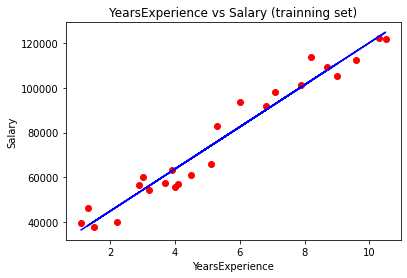

In [ ]:
# visualize the model and training data
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('YearsExperience vs Salary (trainning set)')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

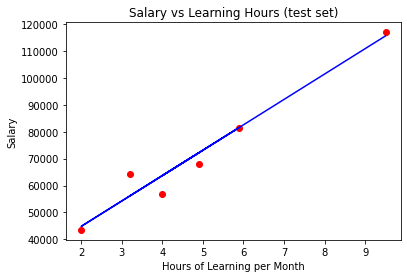

In [ ]:
## visualize the model and testing data
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, regressor.predict(x_test), color = 'blue')
plt.title('Salary vs Learning Hours (test set)')
plt.xlabel("Hours of Learning per Month")
plt.ylabel("Salary")
plt.show()

**Multiple regression**

*   y = b0 + b1\*x1 + b2\*x2 +...






In [ ]:
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# load csv file
data = pandas.read_csv('drive/MyDrive/Colab Notebooks/Multiple_regression.csv')
data.head()

,Price,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace
0,142212,1982,1.0,3,2.00,133,0
1,134865,1676,1.5,3,0.38,14,1
2,118007,1694,2.0,3,0.96,15,1
3,138297,1800,1.0,2,0.48,49,1
4,129470,2088,1.0,3,1.84,29,1


In [ ]:
y_column = list(data.columns)[0]
y = data[y_column]
print(y) # target: predict price 

0       142212
1       134865
2       118007
3       138297
4       129470
         ...  
1042    107695
1043    236737
1044    154829
1045    179492
1046    189108
Name: Price, Length: 1047, dtype: int64


In [ ]:
x_column = list(data.columns)[1:] # x = column 1 to the end
x = data[x_column]
print(x)

      Living Area  Bathrooms  Bedrooms  Lot Size  Age  Fireplace
0            1982        1.0         3      2.00  133          0
1            1676        1.5         3      0.38   14          1
2            1694        2.0         3      0.96   15          1
3            1800        1.0         2      0.48   49          1
4            2088        1.0         3      1.84   29          1
...           ...        ...       ...       ...  ...        ...
1042         1802        2.0         4      0.97   56          1
1043         3239        3.5         4      2.50    1          1
1044         1440        2.0         2      0.61   66          1
1045         2030        2.5         3      1.00    3          1
1046         2097        2.5         3      1.93   10          1

[1047 rows x 6 columns]


In [ ]:
# training and testing 
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 111)

In [ ]:
multi_reg = LinearRegression()
multi_reg.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
# predict testing data
pred = multi_reg.predict(xtest)
show_5_predict = pred[:5]
print('Predict : ', show_5_predict)
print('Actural : ', list(ytest[:5]))

Predict :  [278096.9273492  101145.37142502 105398.36361354 294278.14994044
 150335.07999878]
Actural :  [263226, 88092, 47630, 394532, 103508]


In [ ]:
score = multi_reg.score(xtest, ytest)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')

Score:  0.7205524948672125
Accuracy: 72.05524948672125%


**Polynomial regression**


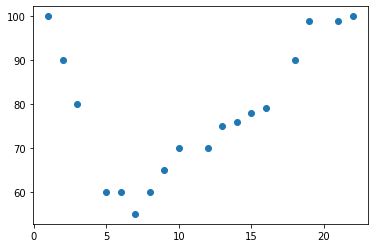

In [ ]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score # R squared = coefficient of determination，一種衡量回歸模型表現的指標

# create data
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

# plot data
plt.scatter(x,y)
plt.show()

In [ ]:
# create polynomial regression model (選擇3次方)
poly_reg = numpy.poly1d(numpy.polyfit(x, y, 3))


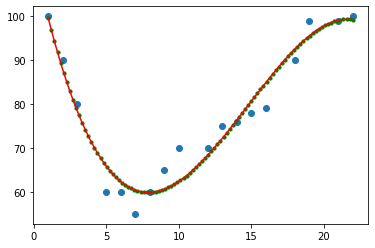

In [ ]:
# plot data with poly_reg line
reg_x = numpy.linspace(min(x), max(x), 100) # create 100 data points range from min(x) to max(x) as points on poly_reg line

plt.scatter(x, y) # original data points
plt.plot(reg_x, poly_reg(reg_x), 'r') # plot poly_reg line
plt.scatter(reg_x, poly_reg(reg_x), c='g', s = 10) # plot reg_x in green color and size 10

plt.show()

In [ ]:
print("r square:", r2_score(y, poly_reg(x)))

r square: 0.9432150416451025
